# Training Dataset Creation

In [1]:
import os
import cv2
from datetime import datetime
import numpy as np

def load_and_crop_images(directories, scale, crop_size=(540, 540), save_dir_gt='/home/jovyan/work/saved_data/HAT/datasets/SI3gt', save_dir_lq='/home/jovyan/work/saved_data/HAT/datasets/SI3lq'):
    """
    Loads and crops all images from multiple directories, then saves them.
    
    Parameters:
    - directories: A list of directories to search for images.
    - crop_size: The size of each crop (width, height).
    - save_dir_gt: Directory to save the cropped high quality images.
    - save_dir_lq: Directory to save the cropped low quality images.
    """
    if not os.path.exists(save_dir_gt):
        os.makedirs(save_dir_gt)
    if not os.path.exists(save_dir_lq):
        os.makedirs(save_dir_lq)

    for directory in directories:
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

            if image is not None:
                # Crop the image into smaller sections
                for i in range(0, image.shape[0], crop_size[1]):
                    for j in range(0, image.shape[1], crop_size[0]):
                        cropped_image_gt = image[i:i+crop_size[1], j:j+crop_size[0]]
                        crop_index = (i // crop_size[1], j // crop_size[0])
                        
                        if np.sum(cropped_image_gt == 0) == 0:  # Check for non-black pixels
                            # Check whether the tile is the full size (for edge tiles)
                            if cropped_image_gt.shape[0] == crop_size[0] and cropped_image_gt.shape[1] == crop_size[1]:

                                # Generate a unique filename for each cropped gt image
                                cropped_filename_gt = f"{filename}_crop_{crop_index[0]}_{crop_index[1]}.png"
                                save_path_gt = os.path.join(save_dir_gt, cropped_filename_gt)

                                # Save the cropped gt image
                                cv2.imwrite(save_path_gt, cropped_image_gt)
                        
                                # Downsample the cropped image
                                new_size = (crop_size[0] // scale, crop_size[1] // scale)
                                cropped_image_lq = cv2.resize(cropped_image_gt, new_size, interpolation=cv2.INTER_AREA)
                        
                                # Generate a unique filename for each cropped lq image
                                cropped_filename_lq = f"{filename}_crop_{crop_index[0]}_{crop_index[1]}.png"
                                save_path_lq = os.path.join(save_dir_lq, cropped_filename_lq)

                                # Save the cropped lq image
                                cv2.imwrite(save_path_lq, cropped_image_lq)
                                
directories = ['/home/jovyan/work/satellite_data/v1', '/home/jovyan/work/satellite_data/v2']
load_and_crop_images(directories, 3)

## Check Directories

In [3]:
import os

def count_images_in_directories(directories):
    """
    Count the number of image files in a list of directories.

    Parameters:
    - directories: List of strings, paths to the directories to be counted.

    Returns:
    - A list of integers representing the number of image files in each directory.
    """
    # Supported image file extensions
    image_extensions = ('.jpeg', '.jpg', '.png', '.gif', '.bmp', '.tif')

    # Initialize a list to store the count of images for each directory
    image_counts = []

    # Loop through each directory and count the number of image files
    for directory in directories:
        # Check if directory exists
        if not os.path.exists(directory):
            print(f"Directory not found: {directory}")
            image_counts.append(0)
            continue

        image_count = len([file for file in os.listdir(directory) if file.lower().endswith(image_extensions)])
        image_counts.append(image_count)

    return image_counts

# Example usage
# Replace the paths with paths to your actual directories
directories = ['/home/jovyan/work/saved_data/HAT/datasets/SI3gt', '/home/jovyan/work/saved_data/HAT/datasets/SI3lq']
image_counts = count_images_in_directories(directories)
print(f"Number of images in each directory: {image_counts}")

Number of images in each directory: [466707, 466707]


## Show first images of directory

/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL2A_20220906T102559_N0400_R108_T32UMB_20220906T131726.tif_crop_14_9.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL1C_20220930T100729_N0400_R022_T33UVV_20220930T121519.tif_crop_0_9.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL2A_20200326T104639_N0214_R051_T31UFU_20200326T141923.tif_crop_7_1.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL1C_20220930T100729_N0400_R022_T33UVU_20220930T121519.tif_crop_16_7.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL1C_20220731T103629_N0400_R008_T31UFQ_20220731T112305.tif_crop_15_8.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL2A_20220807T102559_N0400_R108_T31UGQ_20220807T132122.tif_crop_18_10.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL1C_20220611T103629_N0400_R008_T32ULG_20220611T112149.tif_crop_6_8.png
/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2A_MSIL1C_20220623T103031_N0400_R108_T32UPG_20220623T141109.tif_

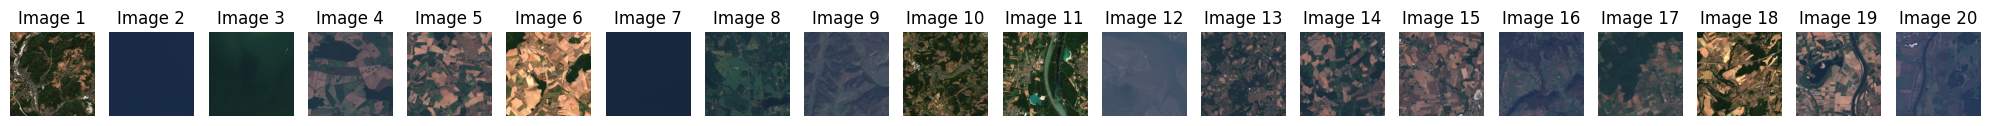

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_first_n_images(directory, n=10):
    """
    Plots the first n images in a directory.

    Parameters:
    - directory: Path to the directory containing the images.
    - n: Number of images to plot.
    """
    # Get all files in the directory
    files = os.listdir(directory)
    
    # Filter out files that are not images
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
    
    # Plot the first n images
    fig, axes = plt.subplots(1, n, figsize=(20, 10))  # Adjust the figure size as necessary
    for i, file in enumerate(image_files[:n]):
        # Load image
        img_path = os.path.join(directory, file)
        print(img_path)
        image = Image.open(img_path)
        
        # Plot image
        ax = axes[i] if n > 1 else axes
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Image {i+1}')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace '/path/to/images' with the actual path to your directory of images
plot_first_n_images('/home/jovyan/work/saved_data/HAT/datasets/SI3gt', n=20)

# Create Artificial Evaluation Data Set

In [ ]:
import os
import shutil

def copy_files_to_folder(file_paths, target_folder):
    """
    Copies the specified files to the target folder.

    :param file_paths: A list of the full paths to the files to be copied.
    :param target_folder: The path to the target folder where the files will be copied.
    """
    # Create the target folder if it does not exist
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Copy each file
    for file_path in file_paths:
        if os.path.isfile(file_path):
            shutil.copy(file_path, target_folder)
        else:
            print(f"File not found: {file_path}")

# First group of file paths and target folder
file_paths_group1 = [
    "/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL2A_20220906T102559_N0400_R108_T32UMB_20220906T131726.tif_crop_14_9.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL1C_20220731T103629_N0400_R008_T31UFQ_20220731T112305.tif_crop_15_8.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2A_MSIL1C_20220812T103031_N0400_R108_T32UMV_20220812T155113.tif_crop_1_10.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2A_MSIL2A_20220812T103031_N0400_R108_T32UMB_20220812T182800.tif_crop_12_7.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3gt/S2B_MSIL2A_20220708T102559_N0400_R108_T32ULU_20220708T131740.tif_crop_7_19.png"
]
target_folder_group1 = "/home/jovyan/work/saved_data/HAT/datasets/Sat2/Sat2Hq"

# Second group of file paths and target folder
file_paths_group2 = [
    "/home/jovyan/work/saved_data/HAT/datasets/SI3lq/S2B_MSIL2A_20220906T102559_N0400_R108_T32UMB_20220906T131726.tif_crop_14_9.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3lq/S2B_MSIL1C_20220731T103629_N0400_R008_T31UFQ_20220731T112305.tif_crop_15_8.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3lq/S2A_MSIL1C_20220812T103031_N0400_R108_T32UMV_20220812T155113.tif_crop_1_10.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3lq/S2A_MSIL2A_20220812T103031_N0400_R108_T32UMB_20220812T182800.tif_crop_12_7.png",
    "/home/jovyan/work/saved_data/HAT/datasets/SI3lq/S2B_MSIL2A_20220708T102559_N0400_R108_T32ULU_20220708T131740.tif_crop_7_19.png"
]
target_folder_group2 = "/home/jovyan/work/saved_data/HAT/datasets/Sat2/Sat2Lq"

# Call the function for the first group
copy_files_to_folder(file_paths_group1, target_folder_group1)

# Call the function for the second group
copy_files_to_folder(file_paths_group2, target_folder_group2)


# Create Real World Evaluation Data Set

In [1]:
from satbm_utils import load_image_s2
from satbm_utils import load_image_wv
from satbm_utils import calculate_brightness
from satbm_utils import adjust_brightness
from satbm_utils import plot_image
from satbm_utils import plot_two_images

wv = load_image_wv('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_4.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_2.tiff', 
             '/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/hr_resized/mul_band_1.tiff')

s2 = load_image_s2('/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b4/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b3/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2', 
'/home/jovyan/work/saved_data/sbench/image_data/0_31UFT_11JUN031102-2AS_R4C2/b2/lrs/S2A_MSIL2A_20190725T105031_N0213_R051_T31UFT_20190725T132538.jp2',)

b_wv = calculate_brightness(wv)
b_s2 = calculate_brightness(s2)
scale_factor = b_s2 / b_wv

print(b_wv)
print(b_s2)

scaled_wv = adjust_brightness(wv, scale_factor)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


27.829833278299002
65.64248081891111


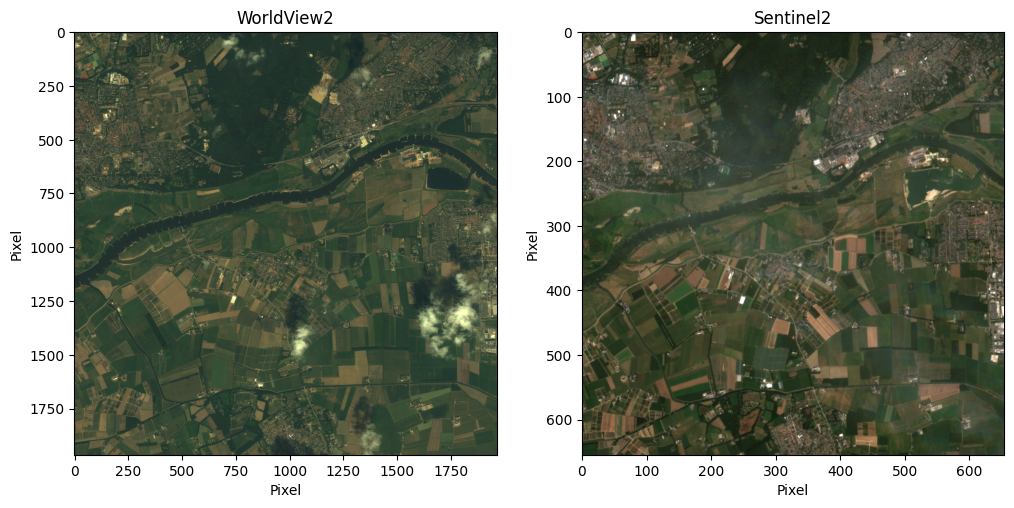

In [2]:
plot_two_images(scaled_wv, s2)

In [3]:
import cv2
import numpy as np

def extract_and_crop_image(save_path, image, extracted_rows, crop_size):
    """
    Extracts a specified number of rows from the top of an image and crops it into specified size patches.
    Saves each patch with an ascending number.

    :param save_path: The base path where the cropped images will be saved.
    :param image: Input image.
    :param extracted_rows: Number of rows to extract from the top of the image.
    :param crop_size: Size of the square crop (e.g., 180 for 180x180).
    """

    # Extract the specified number of rows
    extracted_image = image[:extracted_rows, :]

    patch_number = 1  # Initialize patch number
    for i in range(0, extracted_image.shape[0], crop_size):
        for j in range(0, extracted_image.shape[1], crop_size):
            cropped_image = extracted_image[i:i+crop_size, j:j+crop_size]
            # Check if the cropped image is of the specified size, if not, skip
            if cropped_image.shape[0] == crop_size and cropped_image.shape[1] == crop_size:
                # Construct the filename for each patch
                filename = f"{save_path}/patch_{patch_number}.png"
                cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                cv2.imwrite(filename, cropped_image_rgb)
                patch_number += 1

save_path = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Lq'
extract_and_crop_image(save_path, s2, extracted_rows=360, crop_size=180)


In [4]:
import cv2
import numpy as np

def extract_and_crop_image(save_path, image, extracted_rows, crop_size):
    """
    Extracts a specified number of rows from the top of an image and crops it into specified size patches.
    Saves each patch with an ascending number.

    :param save_path: The base path where the cropped images will be saved.
    :param image: Input image.
    :param extracted_rows: Number of rows to extract from the top of the image.
    :param crop_size: Size of the square crop (e.g., 180 for 180x180).
    """

    # Extract the specified number of rows
    extracted_image = image[:extracted_rows, :]

    patch_number = 1  # Initialize patch number
    for i in range(0, extracted_image.shape[0], crop_size):
        for j in range(0, extracted_image.shape[1], crop_size):
            cropped_image = extracted_image[i:i+crop_size, j:j+crop_size]
            # Check if the cropped image is of the specified size, if not, skip
            if cropped_image.shape[0] == crop_size and cropped_image.shape[1] == crop_size:
                # Construct the filename for each patch
                filename = f"{save_path}/patch_{patch_number}.png"
                cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)  # Convert to RGB
                cv2.imwrite(filename, cropped_image_rgb)
                patch_number += 1

save_path = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Hq'
extract_and_crop_image(save_path, scaled_wv, extracted_rows=1080, crop_size=540)

# Evaluate Nearest Neighbor Approach

## PSNR

In [5]:
import os
import cv2
import numpy as np

def upscale_image_opencv(image, scale_factor):
    new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))
    upscaled_img = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
    return upscaled_img

def calculate_psnr(original_img, upscaled_img):
    mse = np.mean((original_img - upscaled_img) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255 / np.sqrt(mse))
    return psnr

def process_images_in_directory(directory_path_lr, directory_path_gt, scale_factor):
    image_files_lr = [f for f in os.listdir(directory_path_lr) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files_gt = [f for f in os.listdir(directory_path_gt) if f.endswith(('.png', '.jpg', '.jpeg'))]
    results = {}

    for filename in image_files_lr:
        file_path_lr = os.path.join(directory_path_lr, filename)
        original_img = cv2.imread(file_path_lr)
        
        file_path_gt = os.path.join(directory_path_gt, filename)
        gt_img = cv2.imread(file_path_gt)


        upscaled_img = upscale_image_opencv(original_img, scale_factor)
        psnr_value = calculate_psnr(gt_img, upscaled_img)

        results[filename] = psnr_value
    
    return results

# Use the function like this:
directory_path_lr = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Lq'
directory_path_gt = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Hq'
scale_factor = 3  
results = process_images_in_directory(directory_path_lr, directory_path_gt, scale_factor)
print(results)

{'patch_6.png': 28.75624242862887, 'patch_5.png': 28.36340474090872, 'patch_3.png': 28.781944531765816, 'patch_1.png': 28.706881403837052, 'patch_2.png': 29.15852686990407, 'patch_4.png': 29.042335255187982}


In [6]:
def calculate_mean_psnr(psnr_dict):
    total_sum = sum(psnr_dict.values())
    mean_psnr = total_sum / len(psnr_dict)
    return mean_psnr

calculate_mean_psnr(results)

28.80155587170542

## SSIM

In [7]:
import os
import cv2
import numpy as np

def upscale_image_opencv(image, scale_factor):
    new_size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor))
    upscaled_img = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
    return upscaled_img

def calculate_ssim(img, img2):
    ssims = []
    for i in range(img.shape[2]):
        ssims.append(_ssim(img[..., i], img2[..., i]))
    return np.array(ssims).mean()

def _ssim(img, img2):
    """Calculate SSIM (structural similarity) for one channel images.

    It is called by func:`calculate_ssim`.

    Args:
        img (ndarray): Images with range [0, 255] with order 'HWC'.
        img2 (ndarray): Images with range [0, 255] with order 'HWC'.

    Returns:
        float: SSIM result.
    """

    c1 = (0.01 * 255)**2
    c2 = (0.03 * 255)**2
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img, -1, window)[5:-5, 5:-5]  # valid mode for window size 11
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + c1) * (2 * sigma12 + c2)) / ((mu1_sq + mu2_sq + c1) * (sigma1_sq + sigma2_sq + c2))
    return ssim_map.mean()


def process_images_in_directory(directory_path_lr, directory_path_gt, scale_factor):
    image_files_lr = [f for f in os.listdir(directory_path_lr) if f.endswith(('.png', '.jpg', '.jpeg'))]
    image_files_gt = [f for f in os.listdir(directory_path_gt) if f.endswith(('.png', '.jpg', '.jpeg'))]
    results = {}

    for filename in image_files_lr:
        file_path_lr = os.path.join(directory_path_lr, filename)
        original_img = cv2.imread(file_path_lr)
        
        file_path_gt = os.path.join(directory_path_gt, filename)
        gt_img = cv2.imread(file_path_gt)


        upscaled_img = upscale_image_opencv(original_img, scale_factor)
        ssim_value = calculate_ssim(gt_img, upscaled_img)

        results[filename] = ssim_value
    
    return results

# Use the function like this:
directory_path_lr = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Lq'
directory_path_gt = '/home/jovyan/work/saved_data/HAT/datasets/Sat3/Sat3Hq'
scale_factor = 3  
results = process_images_in_directory(directory_path_lr, directory_path_gt, scale_factor)
print(results)

{'patch_6.png': 1.9370440622958427, 'patch_5.png': 1.9728987197560137, 'patch_3.png': 1.955949801890308, 'patch_1.png': 1.8978980633286529, 'patch_2.png': 2.1102403077447214, 'patch_4.png': 1.986388648904062}


In [8]:
def calculate_mean_ssim(ssim_dict):
    total_sum = sum(ssim_dict.values())
    mean_ssim = total_sum / len(ssim_dict)
    return mean_ssim

calculate_mean_ssim(results)

1.9767366006532667